In [11]:
import pandas as pd 
from selenium import webdriver
from selenium.webdriver.common.by import By
import time
from itertools import islice

 PART 1: SCRAPE NFL DRAFT DATA (2023)

In [14]:
# Start a new Chrome session
driver = webdriver.Chrome()

# Go to the 2023 NFL Draft Tracker
draft_data = "https://www.nfl.com/draft/tracker/picks/1/1/2023"
driver.get(draft_data)

# Wait a few seconds for the page (and any lazy-loaded elements) to render
time.sleep(5)

In [16]:
# Initialize lists
overall_pick = []
team_name = []
player_name = []
position = []
college = []
# Find all pick containers
pick_divs = driver.find_elements(By.CLASS_NAME, "css-4wff9j-Ba")
print(f"Found {len(pick_divs)} picks.")

for pick in pick_divs:
    try:
        # Get pick number
        pick_number = pick.find_element(By.CLASS_NAME, "css-lbxg89-Ba").text.strip()

        # Get player name
        try:
            name_container = pick.find_element(By.CLASS_NAME, "css-3cvh5h-Ba")
            name = name_container.text.strip()
        except Exception as e:
            print(f"Skipping player name due to: {e}")
            name = None

        # Get player position
        try:
            player_position = pick.find_element(By.CLASS_NAME, "css-p08v0c-Ba").text.strip()
        except:
            player_position = None

        # Get player college
        try:
            player_college = pick.find_element(By.CLASS_NAME, "css-193kkzn-Ba").text.strip()
        except:
            player_college = None

        # Get NFL team name
        try:
            nfl_team = pick.find_element(By.CLASS_NAME, "css-1m5xtg4-Ba").text.strip()
        except:
            nfl_team = None

        # Append all values
        overall_pick.append(pick_number)
        player_name.append(name)
        position.append(player_position)
        college.append(player_college)
        team_name.append(nfl_team)

    except Exception as e:
        print(f"Skipping one pick because of: {e}")
driver.quit()

# Build the DataFrame
df = pd.DataFrame({
    "overall_pick": overall_pick,
    "Team": team_name,
    "player": player_name,
    "position": position,
    "college": college
})

df


Found 31 picks.


,overall_pick,Team,player,position,college
0,1,CAROLINA,Bryce Young,QB,Alabama
1,2,HOUSTON,C.J. Stroud,QB,Ohio State
2,3,HOUSTON,Will Anderson Jr.,EDGE,Alabama
3,4,INDIANAPOLIS,Anthony Richardson,QB,Florida
4,5,SEATTLE,Devon Witherspoon,CB,Illinois
5,6,ARIZONA,Paris Johnson Jr.,OT,Ohio State
6,7,LAS VEGAS,Tyree Wilson,EDGE,Texas Tech
7,8,ATLANTA,Bijan Robinson,RB,Texas
8,9,PHILADELPHIA,Jalen Carter,DT,Georgia
9,10,CHICAGO,Darnell Wright,OT,Tennessee


In [ ]:
df

In [19]:
# Save the dataframe to a CSV file
df.to_csv("nfl_draft_picks.csv", index=False)

In [21]:
### integrating the datasets

In [41]:
cfb_csv = pd.read_csv("cfb23_datawrangling(cfb23).csv")

In [47]:
# Load the NFL draft picks and college football data
df_nfl = pd.read_csv("nfl_draft_picks.csv")
cfb_csv = pd.read_csv("cfb23_datawrangling(cfb23).csv")

# Merge the two DataFrames on the 'college' column
merged_df = pd.merge(df_nfl, cfb_csv, on="college", how="outer")

# Display the first few rows of the merged DataFrame
merged_df.head()


,overall_pick,Team,player,position,college,Unnamed: 0,Off Rank,Games,Off Plays,Off Yards,...,Def Rank,Def Plays,Yards Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,Penalty Yards,Penalty Yards Per Game,Time of Possession,Turnover Rank
0,NaN,NaN,NaN,NaN,Air Force (Mountain West),76.0,77.0,13.0,826.0,4765.0,...,6.0,738.0,3610.0,29.0,30.0,277.7,322.0,24.77,432:59:00,88.0
1,NaN,NaN,NaN,NaN,Akron (MAC),125.0,126.0,12.0,771.0,3343.0,...,31.0,776.0,4020.0,42.0,43.0,335.0,721.0,60.08,354:31:00,121.0
2,1.0,CAROLINA,Bryce Young,QB,Alabama,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,HOUSTON,Will Anderson Jr.,EDGE,Alabama,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,DETROIT,Jahmyr Gibbs,RB,Alabama,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Tell pandas to display all rows
pd.set_option('display.max_rows', None)


In [63]:
import pandas as pd

# --- 1) Load NFL picks and inspect headers ---
df_nfl = pd.read_csv("nfl_draft_picks.csv")
print("NFL headers before rename:", df_nfl.columns.tolist())

# If the school column is named something else, rename it to 'college'
for col in df_nfl.columns:
    if col.lower() in ("college", "school"):
        df_nfl.rename(columns={col: "college"}, inplace=True)
        break

df_nfl["college"] = df_nfl["college"].str.strip()
print("NFL headers after rename:", df_nfl.columns.tolist())


# --- 2) Load CFB stats, drop any Unnamed index, inspect headers ---
cfb = pd.read_csv("cfb23_datawrangling(cfb23).csv")
if "Unnamed: 0" in cfb.columns:
    cfb.drop(columns=["Unnamed: 0"], inplace=True)
print("CFB headers before rename:", cfb.columns.tolist())

# Find and rename its school column to 'college'
for col in cfb.columns:
    if col.lower() in ("college", "team", "school"):
        cfb.rename(columns={col: "college"}, inplace=True)
        break

# Clean off any "(Conference)" suffix
cfb["college"] = (
    cfb["college"]
    .astype(str)
    .str.replace(r"\s*\(.*\)", "", regex=True)
    .str.strip()
)
print("CFB headers after rename:", cfb.columns.tolist())


# --- 3) Merge on the now-guaranteed 'college' column ---
merged = pd.merge(df_nfl, cfb, on="college", how="left")

# --- 4) Sanity checks ---
print(f"Merged rows: {len(merged)}  (should be 31)")
print("Columns in merged:", merged.columns.tolist())

# Show any picks whose college didn’t find a match in CFB
missing = merged.loc[merged.isna().any(axis=1), "college"].unique()
print("Unmatched colleges:", missing)

# 5) Preview
merged.head()




NFL headers before rename: ['overall_pick', 'Team', 'player', 'position', 'college']
NFL headers after rename: ['overall_pick', 'Team', 'player', 'position', 'college']
CFB headers before rename: ['Off Rank', 'college', 'Games', 'Off Plays', 'Off Yards', 'Off Yards/Play', 'Off TDs', 'Off Yards per Game', 'Def Rank', 'Def Plays', 'Yards Allowed', 'Off TDs Allowed', 'Total TDs Allowed', 'Yards Per Game Allowed', 'Penalty Yards', 'Penalty Yards Per Game', 'Time of Possession', 'Turnover Rank']
CFB headers after rename: ['Off Rank', 'college', 'Games', 'Off Plays', 'Off Yards', 'Off Yards/Play', 'Off TDs', 'Off Yards per Game', 'Def Rank', 'Def Plays', 'Yards Allowed', 'Off TDs Allowed', 'Total TDs Allowed', 'Yards Per Game Allowed', 'Penalty Yards', 'Penalty Yards Per Game', 'Time of Possession', 'Turnover Rank']
Merged rows: 31  (should be 31)
Columns in merged: ['overall_pick', 'Team', 'player', 'position', 'college', 'Off Rank', 'Games', 'Off Plays', 'Off Yards', 'Off Yards/Play', 'Off

,overall_pick,Team,player,position,college,Off Rank,Games,Off Plays,Off Yards,Off Yards/Play,...,Def Rank,Def Plays,Yards Allowed,Off TDs Allowed,Total TDs Allowed,Yards Per Game Allowed,Penalty Yards,Penalty Yards Per Game,Time of Possession,Turnover Rank
0,1,CAROLINA,Bryce Young,QB,Alabama,56.0,14.0,886.0,5503.0,6.21,...,18.0,883.0,4424.0,32.0,32.0,316.0,655.0,46.79,430:15:00,17.0
1,2,HOUSTON,C.J. Stroud,QB,Ohio State,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,HOUSTON,Will Anderson Jr.,EDGE,Alabama,56.0,14.0,886.0,5503.0,6.21,...,18.0,883.0,4424.0,32.0,32.0,316.0,655.0,46.79,430:15:00,17.0
3,4,INDIANAPOLIS,Anthony Richardson,QB,Florida,46.0,12.0,811.0,4909.0,6.05,...,69.0,712.0,4587.0,39.0,40.0,382.2,595.0,49.58,397:13:00,101.0
4,5,SEATTLE,Devon Witherspoon,CB,Illinois,60.0,12.0,811.0,4692.0,5.79,...,61.0,858.0,4527.0,41.0,43.0,377.2,749.0,62.42,340:56:00,119.0


All columns: ['pick', 'Team', 'player', 'position', 'college', 'Off Rank', 'Games', 'Off Plays', 'Off Yards', 'Off Yards/Play', 'Off TDs', 'Off Yards per Game', 'Def Rank', 'Def Plays', 'Yards Allowed', 'Off TDs Allowed', 'Total TDs Allowed', 'Yards Per Game Allowed', 'Penalty Yards', 'Penalty Yards Per Game', 'Time of Possession', 'Turnover Rank']
Yard columns found: ['Off Yards', 'Off Yards/Play', 'Off Yards per Game', 'Yards Allowed', 'Yards Per Game Allowed', 'Penalty Yards', 'Penalty Yards Per Game']
Pick columns found: ['pick']


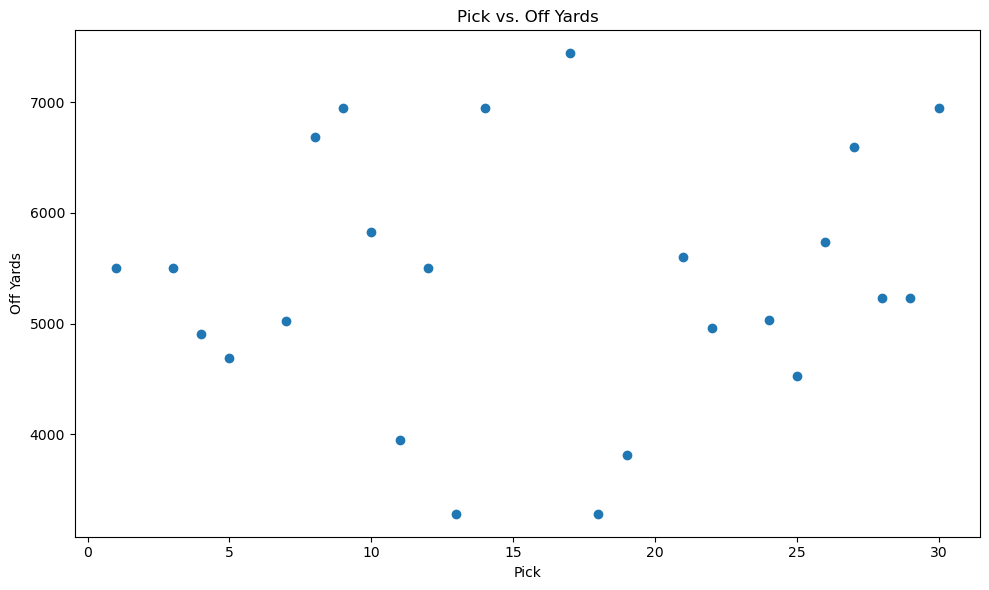

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load & normalize NFL draft picks
df_nfl = pd.read_csv("nfl_draft_picks.csv")
for col in df_nfl.columns:
    if col.lower() in ("college", "school"):
        df_nfl.rename(columns={col: "college"}, inplace=True)
    if "pick" in col.lower():
        df_nfl.rename(columns={col: "pick"}, inplace=True)
df_nfl["college"] = df_nfl["college"].str.strip()

# 2. Load & normalize CFB data
cfb = pd.read_csv("cfb23_datawrangling(cfb23).csv")
cfb.drop(columns=[c for c in cfb.columns if c.startswith("Unnamed")], inplace=True)
for col in cfb.columns:
    if col.lower() in ("college", "team", "school"):
        cfb.rename(columns={col: "college"}, inplace=True)
cfb["college"] = (
    cfb["college"]
    .astype(str)
    .str.replace(r"\s*\(.*\)", "", regex=True)
    .str.strip()
)

# 3. Merge on college
merged = pd.merge(df_nfl, cfb, on="college", how="left")

# 4. Inspect & pick the right columns
print("All columns:", merged.columns.tolist())
yard_cols = [c for c in merged.columns if "yard" in c.lower()]
print("Yard columns found:", yard_cols)
pick_cols = [c for c in merged.columns if "pick" in c.lower()]
print("Pick columns found:", pick_cols)

# 5. Choose the first matching columns
if not yard_cols or not pick_cols:
    raise KeyError("Make sure you have both 'pick' and 'yard' columns in your merged DataFrame")
yard_col = yard_cols[0]
pick_col = pick_cols[0]

# 6. Plot the scatter
plt.figure(figsize=(10, 6))
plt.scatter(merged[pick_col], merged[yard_col])
plt.xlabel(pick_col.replace("_", " ").title())
plt.ylabel(yard_col.replace("_", " ").title())
plt.title(f"{pick_col.replace('_', ' ').title()} vs. {yard_col.replace('_', ' ').title()}")
plt.tight_layout()
plt.show()



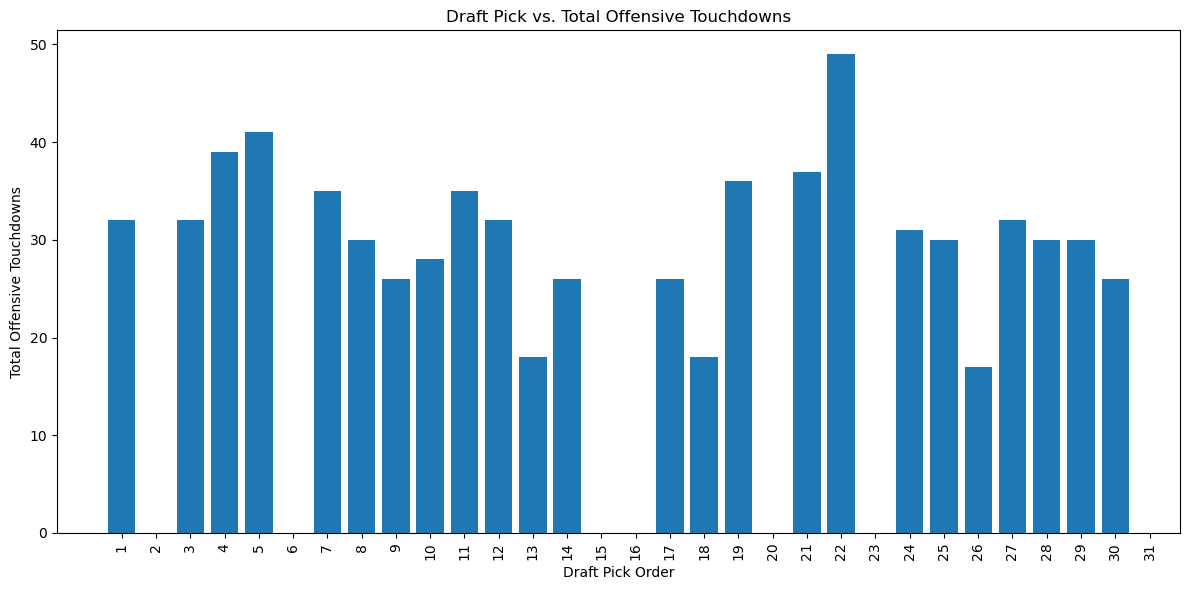

In [92]:
# Visualizations Histogram 
import matplotlib.pyplot as plt

# — adjust these to whatever your real column names are —
# e.g. maybe you called the pick column "overall_pick" or "pick_number"
pick_col = "pick"            # ← your draft‐pick order field
td_col   = "Off TDs Allowed"         # ← or whatever your total‐offense‐TD column is

# If you’re not sure, uncomment to print all columns:
#print(merged.columns.tolist())

# 1) sort by pick so the x‐axis is in order
plot_df = merged.sort_values(by=pick_col)

# 2) draw the bar chart
plt.figure(figsize=(12,6))
plt.bar(plot_df[pick_col], plot_df[td_col])
plt.xlabel("Draft Pick Order")
plt.ylabel("Total Offensive Touchdowns")
plt.title("Draft Pick vs. Total Offensive Touchdowns")
plt.xticks(plot_df[pick_col], rotation=90)  # show every pick label
plt.tight_layout()
plt.show()
